# Pytourch Deep Neuron Network

## 1. Fire up

In [3]:
import torch
from torch.autograd import Variable
import torch.nn as nn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 2. Data generating

In [10]:
x1_Pos = []
x2_Pos = []
y_Pos = []

for i in range(1000):
    temp = 4.0 * np.random.rand() - 2.0
    y_Pos.append(1)
    x1_Pos.append(temp)
    if i % 2 == 0:
        x2_Pos.append(np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn ( ))
    elif i % 2 == 1:
        x2_Pos.append(- np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn () )

这段代码生成了一个包含1000个数据点的数据集，其中每个数据点有三个特征：`x1_Pos`，`x2_Pos`和`y_Pos`。

- 对于每个数据点，首先生成一个在区间[-2.0, 2.0]上均匀分布的随机数`temp`。
- 对于`y_Pos`特征，将其设置为常数1，表示正例。
- 对于`x1_Pos`特征，将其设置为temp的值。
- 对于`x2_Pos`特征，根据以下规则进行设置：
  - 如果当前数据点的索引i是偶数，则将`x2_Pos`设置为`sqrt(4.0 - temp^2) + 0.3 * 随机正态分布的随机数`。
  - 如果当前数据点的索引i是奇数，则将`x2_Pos`设置为`- sqrt(4.0 - temp^2) + 0.3 * 随机正态分布的随机数`。

综合起来，这段代码生成了一个具有两个特征（x1_Pos和x2_Pos）和一个标签（y_Pos）的二分类数据集，其中x1_Pos和x2_Pos的取值与彼此相关，并且存在一定的噪声。

In [15]:
x1_Neg = []
x2_Neg = []
y_Neg = []

for i in range (1000):
    temp = 10.0 * np.random.rand() - 5.0
    y_Neg.append(0)
    x1_Neg. append (temp)
    if i % 2 == 0:
        x2_Neg.append(np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn ())
    elif i % 2 == 1:
        x2_Neg.append(- np.sqrt (25.0 - temp ** 2) + 0.3 * np.random.randn ())

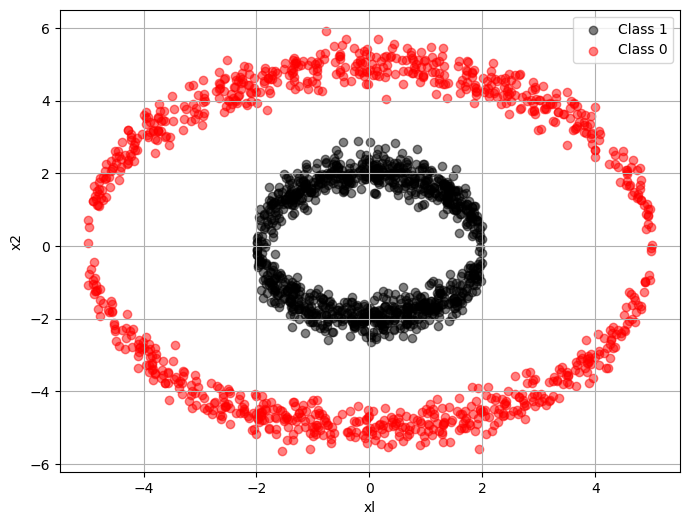

In [18]:
plt.figure(figsize = (8, 6))
plt.scatter(x1_Pos, x2_Pos, color = "black", label = "Class 1", alpha = 0.5)
plt.scatter(x1_Neg, x2_Neg, color = "red", label = "Class 0", alpha = 0.5)
plt.xlabel("xl")
plt.ylabel("x2")
plt.legend ()
plt.grid()
plt.show()

In [17]:
Dict = {"x1": x1_Pos + x1_Neg, "x2": x2_Pos + x2_Neg, "y": y_Pos + y_Neg}
DataTrain = pd.DataFrame(Dict)
DataTrain

,x1,x2,y
0,0.117529,1.440490,1
1,-1.255701,-1.325910,1
2,1.950944,0.462942,1
3,0.744222,-1.889267,1
4,-0.637758,1.741075,1
...,...,...,...
1995,-4.094008,-3.365285,0
1996,-4.273857,3.205604,0
1997,1.081440,-4.366669,0
1998,3.146540,4.072895,0


In [41]:
x1_Pos = []
x2_Pos = []
y_Pos = []

for i in range(250):
    temp = 4.0 * np.random.rand() - 2.0
    y_Pos.append(1)
    x1_Pos.append(temp)
    if i % 2 == 0:
        x2_Pos.append(np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn ( ))
    elif i % 2 == 1:
        x2_Pos.append(- np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn () )

In [42]:
x1_Neg = []
x2_Neg = []
y_Neg = []

for i in range (250):
    temp = 10.0 * np.random.rand() - 5.0
    y_Neg.append(0)
    x1_Neg. append (temp)
    if i % 2 == 0:
        x2_Neg.append(np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn ())
    elif i % 2 == 1:
        x2_Neg.append(- np.sqrt (25.0 - temp ** 2) + 0.3 * np.random.randn ())

In [43]:
Dict = {"x1": x1_Pos + x1_Neg, "x2": x2_Pos + x2_Neg, "y": y_Pos + y_Neg}
DataTest = pd.DataFrame(Dict)
DataTest

,x1,x2,y
0,1.620214,1.175676,1
1,-0.509711,-1.657162,1
2,-0.471200,2.130239,1
3,0.906513,-1.790748,1
4,-1.163231,1.673213,1
...,...,...,...
495,3.438152,-3.321079,0
496,-3.602392,3.356225,0
497,-3.557373,-3.948084,0
498,-0.313884,4.804572,0


# 3. Model training

$$\vec{x}\in\mathbb{R}^{1\times 2}$$

$$W_1\in\mathbb{R}^{2\times 10}; b_1\in\mathbb{R}^{1\times 10}$$

$$W_2\in\mathbb{R}^{10\times 2}; b_2\in\mathbb{R}^{1\times 2}$$

$$z_1 = \sigma(\vec{x}W_1+b_1)$$

$$z_2 = \sigma(z_1W_2+b_2)$$

$$\hat{y} = {\rm{softmax}}(z_2)$$
*****

$$Loss (W_1, W_2, b_1, b_2) = -\frac{1}{N}\sum_{i=1}^{N}[y_i\log\hat{y} +（1-y_1)\log(1-\hat{y})]$$

*****
$$k = 0,1,2,...$$

$$W_1^{(k+1)} = W_1^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)}, W_2^{(k)}, b_1^{(k)}, b_2^{(k})}{\partial
W_1}$$

$$W_2^{(k+1)} = W_2^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)}, W_2^{(k)}, b_1^{(k)}, b_2^{(k})}{\partial
W_2}$$

$$b_1^{(k+1)} = b_1^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)}, W_2^{(k)}, b_1^{(k)}, b_2^{(k})}{\partial
b_1}$$

$$b_2^{(k+1)} = b_2^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)}, W_2^{(k)}, b_1^{(k)}, b_2^{(k})}{\partial
b_2}$$

In [28]:
class DeepNeuralNetworkModel(nn.Module):
    
    # Constructor of the class
    def __init__(self, input_dim1, output_dim1, input_dim2, output_dim2):   # output_dim1 = input_dim2
        super(DeepNeuralNetworkModel, self).__init__()
        
        # Fully Connected Layer 1
        self.FC_layer1 = nn.Linear(input_dim1, output_dim1)
        
        # nn.init.constant_(self.FC_layerl.weight, 0.1)
        # nn.init.constant_(self.FC_layer1.bias, -0.1)
        
        # Fully Connected Layer 2
        self.FC_layer2 = nn.Linear(input_dim2, output_dim2)
        # nn.init.constant_(self.FC_layer2.weight, 0.1)
        # nn.init.constant_(self.FC_layer2.bias, -0.1)

        # Activation Function Sigmoid()
        self.act_sig = nn.Sigmoid()
        
    # Forward propagation function
    def forward(self, x):     # dim of x: N*2
        z1_ = self.FC_layer1(x)
        z1  = self.act_sig(z1_)
        
        z2_ = self.FC_layer2(z1)
        z2  = self.act_sig(z2_)
        
        return z2

这段代码定义了一个名为`DeepNeuralNetworkModel`的神经网络模型类。该类继承自`nn.Module`，是PyTorch中构建神经网络模型的基类。

在该类中，包含以下几个主要部分：

1. 构造函数`__init__`：初始化模型的参数和层结构。它接收输入维度和输出维度作为参数，并定义了两个全连接层（`self.FC_layer1`和`self.FC_layer2`），以及一个Sigmoid激活函数（`self.act_sig`）。

2. 前向传播函数`forward`：定义了数据在模型中前向传播的流程。输入数据x首先通过第一个全连接层（`self.FC_layer1`）进行线性变换，然后经过Sigmoid激活函数（`self.act_sig`）。接着，输出结果再通过第二个全连接层（`self.FC_layer2`）进行线性变换，最后再经过一次Sigmoid激活函数得到最终的输出结果。

该模型的结构是一个两层的全连接神经网络:

- 第一层输入维度为`input_dim1`，第一层输出维度为`output_dim1`
- 第二层的输入维度为`output_dim1`（即第一层的输出维度），第二层的输出维度为`output_dim2`。

整个模型的作用是将输入数据映射到一个输出结果，通过两个全连接层和激活函数的组合来实现非线性映射和特征提取。

In [29]:
X_vec = torch.tensor(DataTrain[["x1", "x2"]].values, dtype=torch.float32)  # N*2
y_vec = torch.tensor(DataTrain["y"].values, dtype=torch.int64).reshape(-1, 1)  # N*1

In [30]:
alpha = 0.2
DNN_Model = DeepNeuralNetworkModel(2, 10, 10, 2)

# 优化DNN model里的所有参数，lr:learning rate 学习率（动态变化）
optimizer = torch.optim.SGD(DNN_Model.parameters(), lr = alpha)
# 损失函数
loss_function = nn.CrossEntropyLoss ()

# Dynamically Change the learning rate
def adjust_learning_rate(optimizer, epoch):   # epoch就可以理解为是一次迭代
    lr = alpha / (1 + 0.00001 * epoch)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [31]:
Iter_times = 200000
loss_list = []

for i in range(Iter_times):
    
    outputs = DNN_Model.forward(X_vec)  # forward propagation
    
    loss = loss_function(outputs, torch.squeeze(y_vec))  # compute loss
    
    loss.backward() # backward propagation 
    
    optimizer.step() # update parameters
    
    optimizer.zero_grad() # Reset grad to 0
    
    if (i + 1) % 500 == 0:
        print(i + 1, "iterations have been completed!")
        print("-> Now loss =", loss)
        print("=========================================")
        
    adjust_learning_rate(optimizer, i)
    
    loss_list.append(loss)
    # length = loss_list.__len__()
    # if(torch.abs(loss_listrlength - 11 - loss_list rlength - 21)<10** 1-15) and length >=2):
        # break

500 iterations have been completed!
-> Now loss = tensor(0.6814, grad_fn=<NllLossBackward0>)
1000 iterations have been completed!
-> Now loss = tensor(0.6406, grad_fn=<NllLossBackward0>)
1500 iterations have been completed!
-> Now loss = tensor(0.5620, grad_fn=<NllLossBackward0>)
2000 iterations have been completed!
-> Now loss = tensor(0.4912, grad_fn=<NllLossBackward0>)
2500 iterations have been completed!
-> Now loss = tensor(0.4461, grad_fn=<NllLossBackward0>)
3000 iterations have been completed!
-> Now loss = tensor(0.4169, grad_fn=<NllLossBackward0>)
3500 iterations have been completed!
-> Now loss = tensor(0.3933, grad_fn=<NllLossBackward0>)
4000 iterations have been completed!
-> Now loss = tensor(0.3756, grad_fn=<NllLossBackward0>)
4500 iterations have been completed!
-> Now loss = tensor(0.3634, grad_fn=<NllLossBackward0>)
5000 iterations have been completed!
-> Now loss = tensor(0.3549, grad_fn=<NllLossBackward0>)
5500 iterations have been completed!
-> Now loss = tensor(0.3

30500 iterations have been completed!
-> Now loss = tensor(0.3173, grad_fn=<NllLossBackward0>)
31000 iterations have been completed!
-> Now loss = tensor(0.3173, grad_fn=<NllLossBackward0>)
31500 iterations have been completed!
-> Now loss = tensor(0.3172, grad_fn=<NllLossBackward0>)
32000 iterations have been completed!
-> Now loss = tensor(0.3171, grad_fn=<NllLossBackward0>)
32500 iterations have been completed!
-> Now loss = tensor(0.3171, grad_fn=<NllLossBackward0>)
33000 iterations have been completed!
-> Now loss = tensor(0.3170, grad_fn=<NllLossBackward0>)
33500 iterations have been completed!
-> Now loss = tensor(0.3170, grad_fn=<NllLossBackward0>)
34000 iterations have been completed!
-> Now loss = tensor(0.3169, grad_fn=<NllLossBackward0>)
34500 iterations have been completed!
-> Now loss = tensor(0.3169, grad_fn=<NllLossBackward0>)
35000 iterations have been completed!
-> Now loss = tensor(0.3168, grad_fn=<NllLossBackward0>)
35500 iterations have been completed!
-> Now loss 

60500 iterations have been completed!
-> Now loss = tensor(0.3154, grad_fn=<NllLossBackward0>)
61000 iterations have been completed!
-> Now loss = tensor(0.3154, grad_fn=<NllLossBackward0>)
61500 iterations have been completed!
-> Now loss = tensor(0.3154, grad_fn=<NllLossBackward0>)
62000 iterations have been completed!
-> Now loss = tensor(0.3154, grad_fn=<NllLossBackward0>)
62500 iterations have been completed!
-> Now loss = tensor(0.3154, grad_fn=<NllLossBackward0>)
63000 iterations have been completed!
-> Now loss = tensor(0.3153, grad_fn=<NllLossBackward0>)
63500 iterations have been completed!
-> Now loss = tensor(0.3153, grad_fn=<NllLossBackward0>)
64000 iterations have been completed!
-> Now loss = tensor(0.3153, grad_fn=<NllLossBackward0>)
64500 iterations have been completed!
-> Now loss = tensor(0.3153, grad_fn=<NllLossBackward0>)
65000 iterations have been completed!
-> Now loss = tensor(0.3153, grad_fn=<NllLossBackward0>)
65500 iterations have been completed!
-> Now loss 

90500 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
91000 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
91500 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
92000 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
92500 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
93000 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
93500 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
94000 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
94500 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
95000 iterations have been completed!
-> Now loss = tensor(0.3148, grad_fn=<NllLossBackward0>)
95500 iterations have been completed!
-> Now loss 

120500 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
121000 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
121500 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
122000 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
122500 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
123000 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
123500 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
124000 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
124500 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
125000 iterations have been completed!
-> Now loss = tensor(0.3145, grad_fn=<NllLossBackward0>)
125500 iterations have been completed!
-

150500 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
151000 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
151500 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
152000 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
152500 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
153000 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
153500 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
154000 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
154500 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
155000 iterations have been completed!
-> Now loss = tensor(0.3143, grad_fn=<NllLossBackward0>)
155500 iterations have been completed!
-

180500 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
181000 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
181500 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
182000 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
182500 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
183000 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
183500 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
184000 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
184500 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
185000 iterations have been completed!
-> Now loss = tensor(0.3142, grad_fn=<NllLossBackward0>)
185500 iterations have been completed!
-

## 4. Visualization of the Cross Entropy Loss Function

The length of loss_list is: 200000


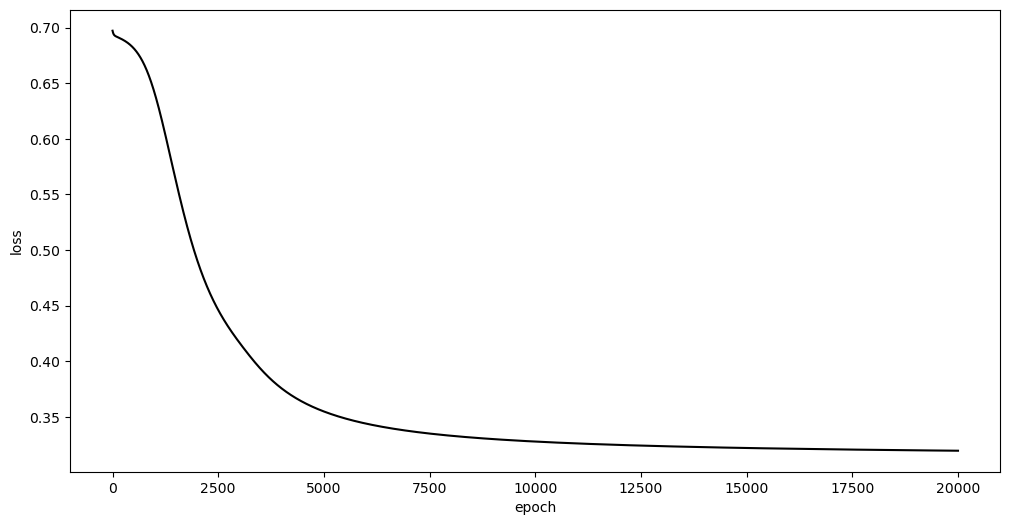

In [38]:
plt.figure(figsize = (12, 6))
length = len(loss_list)
print("The length of loss_list is:", length)
plt.plot(np.arange(1, 20001, 1), [loss.detach().numpy() for loss in loss_list[0:20000]], "black") 
plt.xlabel("epoch") 
plt.ylabel("loss")
plt.show()

In [44]:
# 开始测试
X_vec_test = torch.tensor(DataTest[["x1","x2"]].values, dtype=torch.float32)  # N*2
y_vec_test = torch.tensor(DataTest["y"].values, dtype=torch.int64).reshape(-1, 1)  # N*1

pred = DNN_Model.forward(X_vec_test)
pred_vec = pred [:, 1]
pred_vec[pred_vec > 0.50] = 1
pred_vec[pred_vec <= 0.50 ] = 0

In [45]:
pred_vec

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [49]:
y_pred_np = y_vec_test.detach().numpy()
y_pred_np = np.squeeze(y_pred_np)
print("Shape of y_pred_p:", y_pred_np.shape)

pred_vec_np = pred_vec.detach().numpy()
pred_vec_np = np. squeeze (pred_vec_np)
print ("Shape of y_pred_p:", pred_vec_np.shape)

Shape of y_pred_p: (500,)
Shape of y_pred_p: (500,)


In [52]:
accuracy = accuracy_score (y_vec_test, y_pred_np)
print ("The accuracy score is:", accuracy)

The accuracy score is: 1.0
